In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
#Load all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/kaggle/input/covid19-indonesia/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [3]:
#Remove extra spaces and change the column name into lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths',
       'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths',
       'total_recovered', 'total_active_cases', 'location_level',
       'city_or_regency', 'province', 'country', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [4]:
#Find if there's any duplicate data based on id
len(df)-len(df.drop_duplicates())

0

In [5]:
#Get info from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         31822 non-null  object 
 1   location_iso_code            31822 non-null  object 
 2   location                     31822 non-null  object 
 3   new_cases                    31822 non-null  int64  
 4   new_deaths                   31822 non-null  int64  
 5   new_recovered                31822 non-null  int64  
 6   new_active_cases             31822 non-null  int64  
 7   total_cases                  31822 non-null  int64  
 8   total_deaths                 31822 non-null  int64  
 9   total_recovered              31822 non-null  int64  
 10  total_active_cases           31822 non-null  int64  
 11  location_level               31822 non-null  object 
 12  city_or_regency              0 non-null      float64
 13  province        

In [6]:
#Examine unique values in column location_iso_code, location, province, population, and population_density
print(df['location_iso_code'].unique(), "total unique values:", len(df['location_iso_code'].unique()))
print(df['location'].unique(), "total unique values:", len(df['location_iso_code'].unique()))
print(df['province'].unique(), "total unique values:", len(df['location_iso_code'].unique()))
print(df['population'].unique(), "total unique values:", len(df['location_iso_code'].unique()))
print(df['population_density'].unique(), "total unique values:", len(df['location_iso_code'].unique()))

['ID-JK' 'IDN' 'ID-RI' 'ID-JB' 'ID-BT' 'ID-JT' 'ID-SG' 'ID-BA' 'ID-KI'
 'ID-YO' 'ID-SU' 'ID-JI' 'ID-KR' 'ID-SN' 'ID-JA' 'ID-MA' 'ID-PA' 'ID-MU'
 'ID-SS' 'ID-AC' 'ID-KT' 'ID-LA' 'ID-ST' 'ID-SA' 'ID-SB' 'ID-PB' 'ID-KU'
 'ID-SR' 'ID-KB' 'ID-KS' 'ID-BB' 'ID-BE' 'ID-NB' 'ID-NT' 'ID-GO'] total unique values: 35
['DKI Jakarta' 'Indonesia' 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daerah Istimewa Yogyakarta' 'Sumatera Utara' 'Jawa Timur'
 'Kepulauan Riau' 'Sulawesi Selatan' 'Jambi' 'Maluku' 'Papua'
 'Maluku Utara' 'Sumatera Selatan' 'Aceh' 'Kalimantan Tengah' 'Lampung'
 'Sulawesi Tengah' 'Sulawesi Utara' 'Sumatera Barat' 'Papua Barat'
 'Kalimantan Utara' 'Sulawesi Barat' 'Kalimantan Barat'
 'Kalimantan Selatan' 'Kepulauan Bangka Belitung' 'Bengkulu'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Gorontalo'] total unique values: 35
['DKI Jakarta' nan 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daera

In [7]:
#Change datatype from column "date" to datetime64
df['date'] = pd.to_datetime(df['date'])

#examine the dataframe again
df.head()

,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,city_or_regency,province,country,continent,island,time_zone,special_status,total_regencies,total_cities,total_districts,total_urban_villages,total_rural_villages,area_(km2),population,population_density,longitude,latitude,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [8]:
#Let's see COVID-19 case growth in Indonesia
date_case = df.groupby(['date'])[['new_cases']].sum().reset_index()
px.line(x=date_case['date'],y=date_case['new_cases'], labels={'x': 'Date', 'y':'Total Cases'}, title ='Growth of COVID-19 in Indonesia')

In [9]:
#Now let's see total death cases due to COVID-19 in Indonesia throughout the years
date_death = df.groupby(['date'])[['new_deaths']].sum().reset_index()
px.line(x=date_death['date'],y=date_death['new_deaths'], labels={'x': 'Date', 'y':'Total Deaths'}, title ='Total Death Cases of COVID-19 in Indonesia')

In [10]:
#Let's analyze how many total cases, deaths, and recovered in each province
prov = df.groupby(['province','population_density'])[['total_cases', 'total_recovered', 'total_deaths']].max().reset_index(). sort_values(['total_cases'], ascending=False)
prov['death_percentage'] = (prov['total_deaths']/prov['total_cases'])*100
prov['recovered_percentage'] = (prov['total_recovered']/prov['total_cases'])*100
print(prov.shape)
prov

(34, 7)


,province,population_density,total_cases,total_recovered,total_deaths,death_percentage,recovered_percentage
4,DKI Jakarta,16334.31,1412511,1386134,15513,1.098257,98.132616
8,Jawa Barat,1276.55,1173731,1144358,15937,1.357807,97.497467
9,Jawa Tengah,1108.64,636409,601517,33489,5.262182,94.517362
10,Jawa Timur,846.78,601545,569003,31764,5.280403,94.590263
2,Banten,1109.64,333875,328482,2950,0.883564,98.384725
5,Daerah Istimewa Yogyakarta,1158.90,224307,217712,5928,2.642807,97.059833
14,Kalimantan Timur,27.52,209017,203022,5726,2.739490,97.131812
1,Bali,729.43,166831,161629,4731,2.835804,96.881874
33,Sumatera Utara,203.82,158866,154924,3288,2.069669,97.518664
25,Riau,69.80,152648,147973,4452,2.916514,96.937398


In [11]:
#Find correlation between each column 
prov.corr()

/tmp/ipykernel_20/1089781177.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,population_density,total_cases,total_recovered,total_deaths,death_percentage,recovered_percentage
population_density,1.000000,0.755870,0.761437,0.327445,-0.194738,0.117073
total_cases,0.755870,1.000000,0.999883,0.711362,-0.059325,-0.068321
total_recovered,0.761437,0.999883,1.000000,0.700653,-0.070189,-0.057935
total_deaths,0.327445,0.711362,0.700653,1.000000,0.455592,-0.514639
death_percentage,-0.194738,-0.059325,-0.070189,0.455592,1.000000,-0.975560
recovered_percentage,0.117073,-0.068321,-0.057935,-0.514639,-0.975560,1.000000


Text(0, 0.5, 'Province')

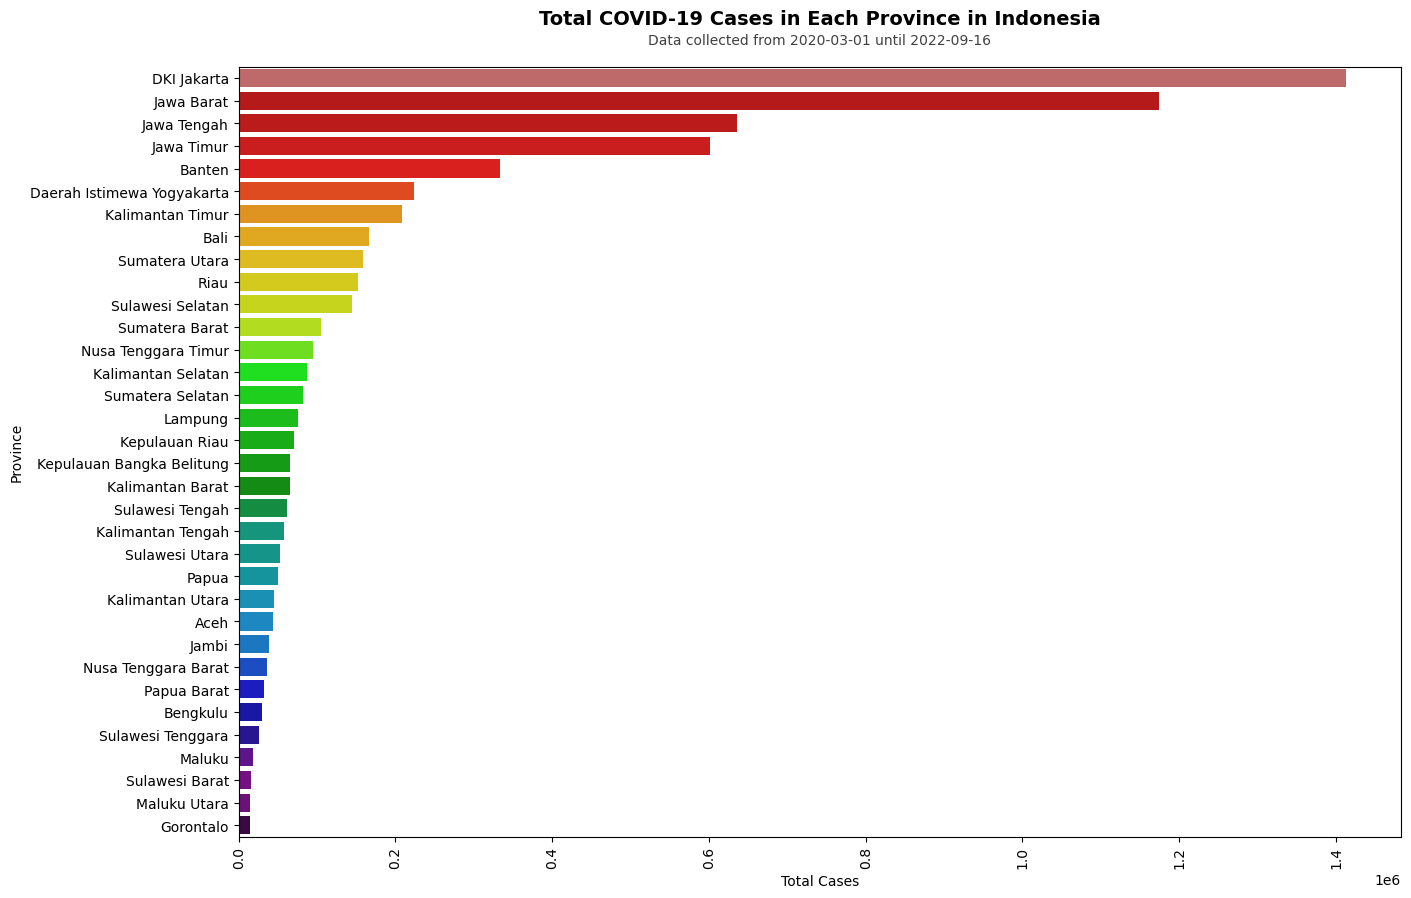

In [12]:
#Visualize the total case in each province
plt.figure(figsize=(15,10),dpi=100)
plt.xticks(rotation=90)
ax = sns.barplot(x=prov['total_cases'], y=prov['province'], palette="nipy_spectral_r")
ax.text(x=0.5, y=1.05, s='Total COVID-19 Cases in Each Province in Indonesia', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.025, s='Data collected from 2020-03-01 until 2022-09-16', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.xlabel('Total Cases')
plt.ylabel('Province')

(-50.0, 300000.0)

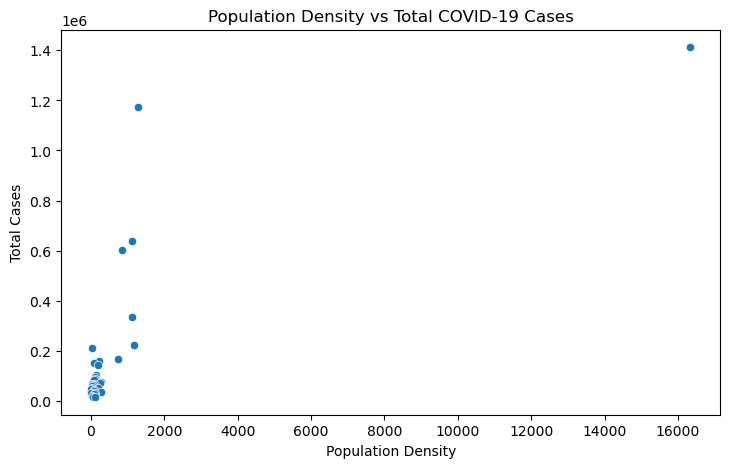

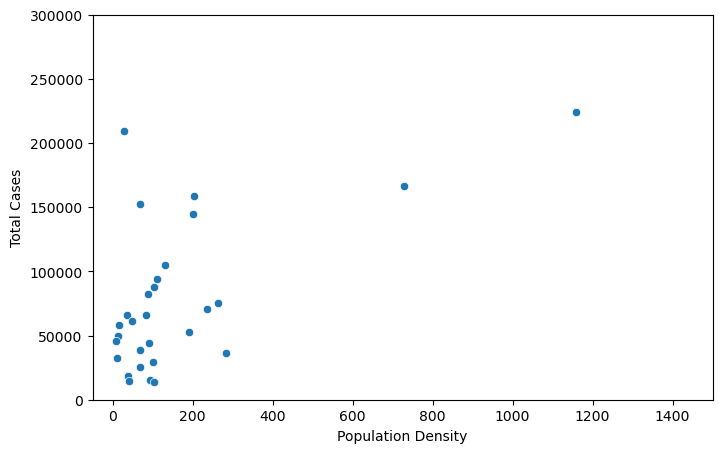

In [13]:
#from the correlation coefficient, we can see that total cases is correlated with population density in a certain area 

plt.figure(figsize=(8.5,5))
sns.scatterplot(x=prov['population_density'], y=prov['total_cases'])
plt.xlabel('Population Density')
plt.ylabel('Total Cases')
plt.title('Population Density vs Total COVID-19 Cases')

#to see the plot clearly, we'll limit the x axis to 1500
plt.figure(figsize=(8,5))
sns.scatterplot(x=prov['population_density'], y=prov['total_cases'])
plt.xlabel('Population Density')
plt.ylabel('Total Cases')
plt.xlim(-50,1500)
plt.ylim(-50,300000)

Text(0.5, 0, 'Total Recovered')

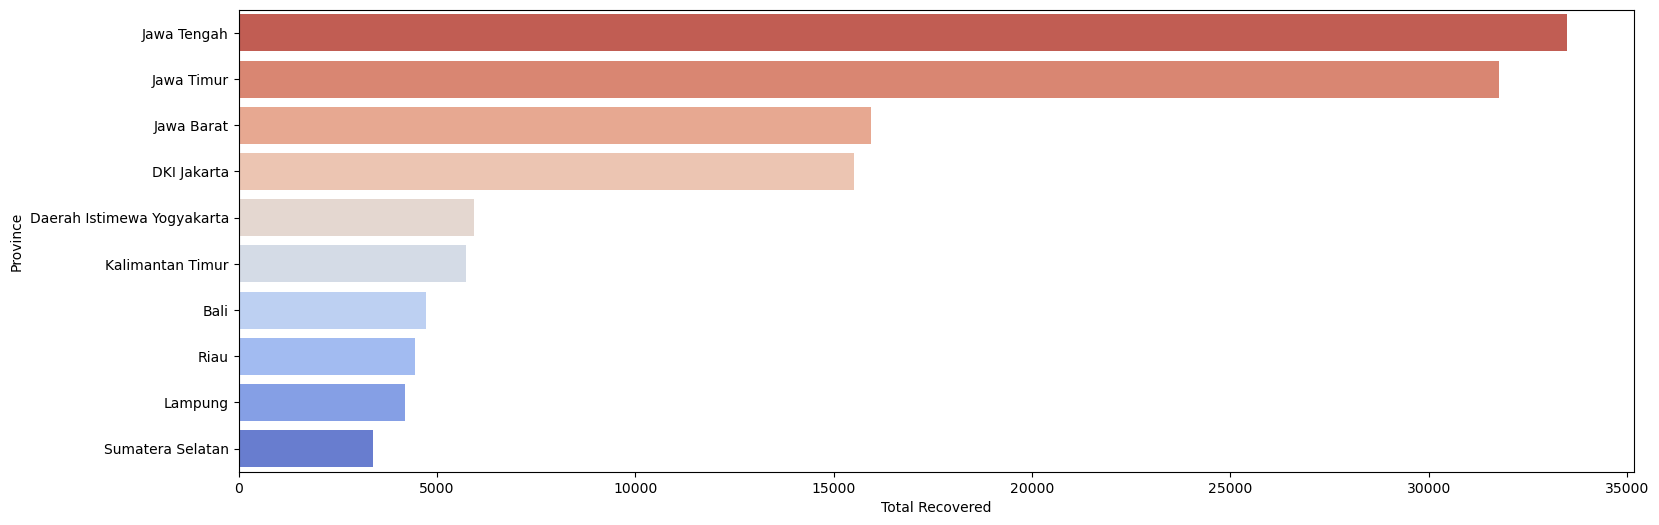

In [14]:
#Let's see the province with the most total deaths
top_10_deaths = prov.sort_values('total_deaths', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(x=top_10_deaths['total_deaths'],y=top_10_deaths['province'], palette='coolwarm_r')
plt.ylabel('Province')
plt.xlabel('Total Recovered')

Text(0.5, 0, 'Province')

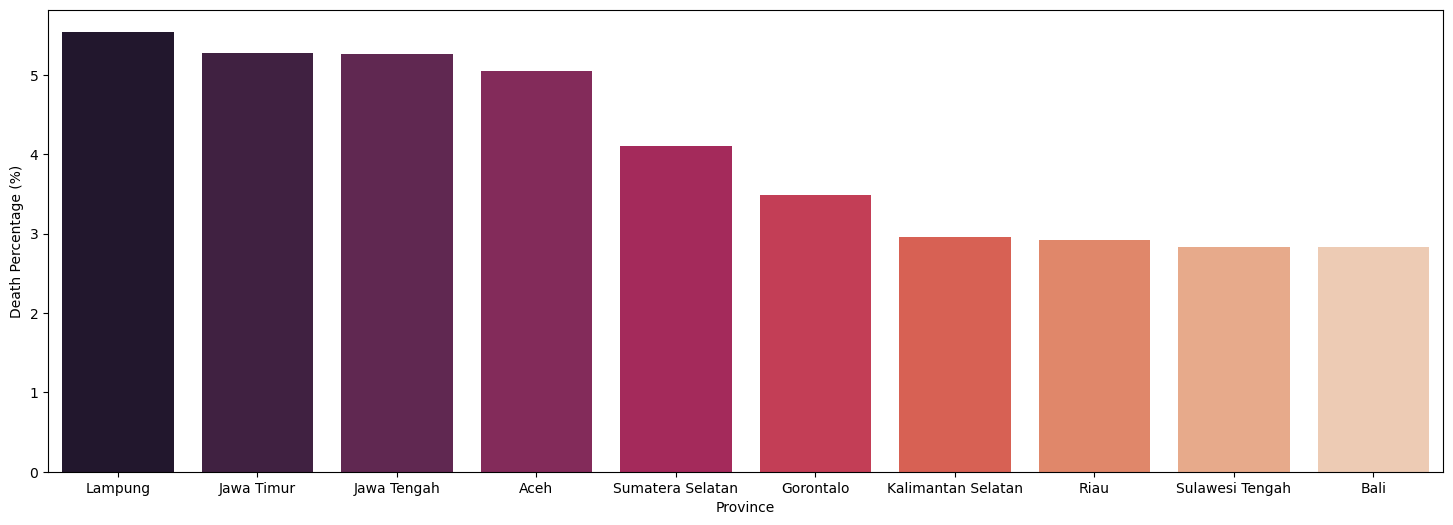

In [15]:
#Let's see the province with the highest death percentage
top_10_dp= prov.sort_values('death_percentage', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(y=top_10_dp['death_percentage'],x=top_10_dp['province'], palette='rocket')
plt.ylabel('Death Percentage (%)')
plt.xlabel('Province')

Text(0.5, 0, 'Total Recovered')

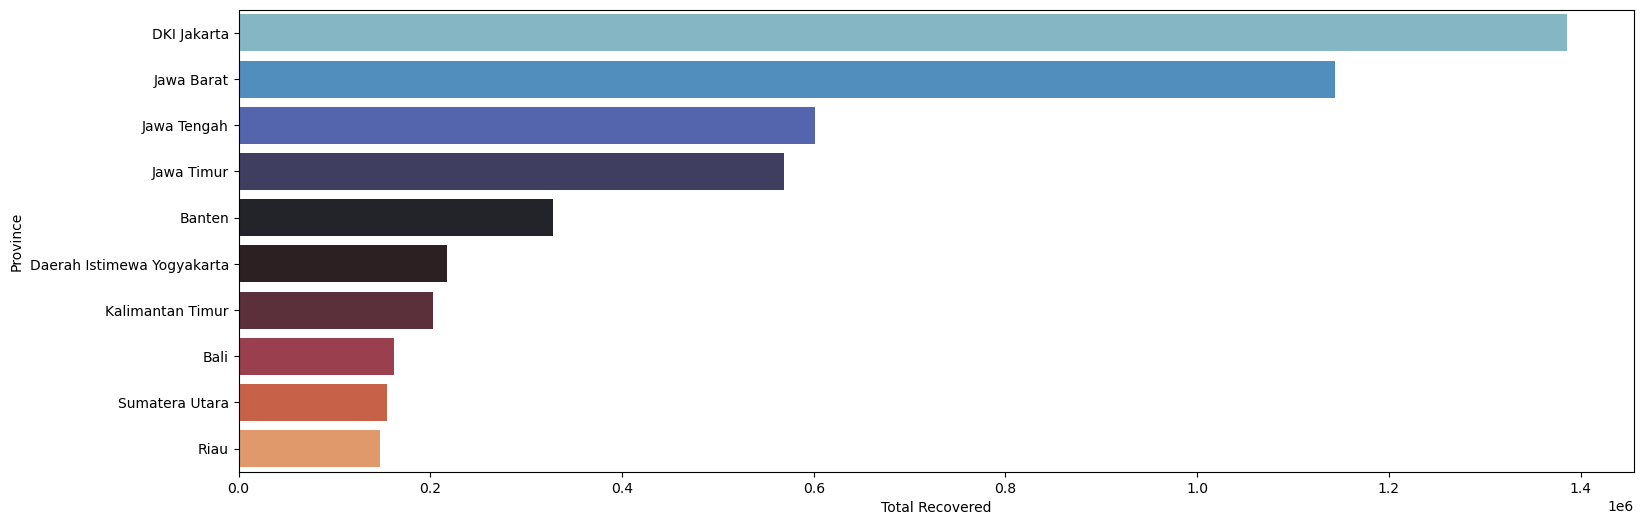

In [16]:
#Let's see the province with the most total recovered cases
top_10_rec = prov.sort_values('total_recovered', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(x=top_10_rec['total_recovered'],y=top_10_rec['province'], palette='icefire')
plt.ylabel('Province')
plt.xlabel('Total Recovered')